# Exploratory Data Analysis on Video Game Sales 


Analyzing the sales of videogames starting from 1980 to present and analyzing the popular genres all over the world throughout the time period.

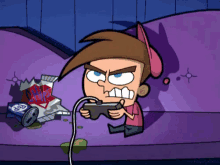

In [1]:
from IPython.display import Image
Image(filename='VG.gif')


## Introduction


We will use the data collected about the videogames with sales greater than 100,000 copies all over the globe.You can find the raw data over here https://www.kaggle.com/gregorut/videogamesales

In [2]:
!pip install pandas jovian --quiet
import jovian
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
raw_df=pd.read_csv('vgsales.csv')

In [4]:
raw_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


The dataset has over 16000 games listed of different genres and platforms.We have various publishers and some of the all time favorites franchises as well such as Super Mario and Pokemon.So let's dig in the data.

In [5]:
raw_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

So the sales over 4 region in specific (North America, Europe, Japan , Other) and the global sales numbers are listed.These numbers are the total number of copies sold in millions per region.

## Data Cleaning and Preparation 


In [6]:
raw_df.Year.max()

2020.0

This is a mistake as the raw data was last updated 4 years ago and thus the correct numbers of those years are not feeded in this database.Thus we need to get rid of the unupdated information.

In [7]:
year=['Year','Name','Publisher','Genre']
year_df=raw_df[year]

In [8]:
year_df.sort_values(by=['Year'],ascending=False).head(10)

,Year,Name,Publisher,Genre
5957,2020.0,Imagine: Makeup Artist,Ubisoft,Simulation
14390,2017.0,Phantasy Star Online 2 Episode 4: Deluxe Package,Sega,Role-Playing
16241,2017.0,Phantasy Star Online 2 Episode 4: Deluxe Package,Sega,Role-Playing
16438,2017.0,Brothers Conflict: Precious Baby,Idea Factory,Action
8293,2016.0,Shin Megami Tensei IV: Final,Deep Silver,Role-Playing
13647,2016.0,Hitman (2016),Square Enix,Action
13596,2016.0,Card Fight!! Vanguard G: Stride to Victory!!,FuRyu,Misc
13602,2016.0,Refrain no Chika Meikyuu to Majo no Ryodan,Nippon Ichi Software,Action
13614,2016.0,Utawarerumono: Futari no Hakuoro,Aqua Plus,Misc
13620,2016.0,Kamen Rider: Battride War Genesis,Namco Bandai Games,Action


In [9]:
raw_df.drop(raw_df[raw_df.Year>2017].index, inplace=True)



In [10]:
raw_df.sort_values(by=['Year'],ascending=False).head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
3145,3147,NBA 2K17,XOne,2016.0,Sports,Take-Two Interactive,0.54,0.04,0.00,0.07,0.64
15184,15187,Sengoku Otome: Legend Battle,PSV,2016.0,Action,Unknown,0.00,0.00,0.02,0.00,0.02
16260,16263,Paragon,PS4,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
15166,15169,Aegis of Earth: Protonovus Assault,PS4,2016.0,Action,PQube,0.02,0.00,0.00,0.00,0.02
9250,9252,Far Cry: Primal,PC,2016.0,Action,Ubisoft,0.04,0.09,0.00,0.01,0.14
5056,5058,FIFA 17,PS3,2016.0,Sports,Electronic Arts,0.02,0.29,0.01,0.05,0.38
16252,16255,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,Nordic Games,0.00,0.01,0.00,0.00,0.01


Now that we have dropped all the records which were after 2017.We updated the raw dataframe,now its record contains data from the year 1980-2017.Let's look at some other details about the data 

In [11]:
raw_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16597.000000,16326.000000,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,8300.746340,2006.405611,0.264667,0.146661,0.077786,0.048065,0.537456
std,4791.963823,5.828189,0.816708,0.505365,0.309299,0.188594,1.555074
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8301.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12450.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The count of year column is not equal to the count of rank , that indicates that some entries miss the information of the year.We need to find the columns which don't have the year information.

In [12]:
year_df[year_df.Year.isnull()]

,Year,Name,Publisher,Genre
179,NaN,Madden NFL 2004,Electronic Arts,Sports
377,NaN,FIFA Soccer 2004,Electronic Arts,Sports
431,NaN,LEGO Batman: The Videogame,Warner Bros. Interactive Entertainment,Action
470,NaN,wwe Smackdown vs. Raw 2006,NaN,Fighting
607,NaN,Space Invaders,Atari,Shooter
...,...,...,...,...
16307,NaN,Freaky Flyers,Unknown,Racing
16327,NaN,Inversion,Namco Bandai Games,Shooter
16366,NaN,Hakuouki: Shinsengumi Kitan,Unknown,Adventure
16427,NaN,Virtua Quest,Unknown,Role-Playing


So there are 271 entries which don't have the data about the year of release. We could either look for these dates from other databases or drop the entries which don't have the values of the year. As the number of entries not having the year of release are considerably low as compared to the total number of entries.Deleting this entries won't affect much. Therefore, for this analysis we are deleting these entries.

In [13]:
raw_df.drop(raw_df[raw_df.Year.isnull()].index, inplace=True)

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16326 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16326 non-null  int64  
 1   Name          16326 non-null  object 
 2   Platform      16326 non-null  object 
 3   Year          16326 non-null  float64
 4   Genre         16326 non-null  object 
 5   Publisher     16290 non-null  object 
 6   NA_Sales      16326 non-null  float64
 7   EU_Sales      16326 non-null  float64
 8   JP_Sales      16326 non-null  float64
 9   Other_Sales   16326 non-null  float64
 10  Global_Sales  16326 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


We could observe that there is a difference in the value of non null entries of other columns and Publisher.Which indicates that there are some entries which don't have the data about the publisher of the game.We need to remove these entries as well.

In [15]:
raw_df=raw_df.dropna()
raw_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

We have successfully removed all the null values from the raw dataframe and now we could proceed to analyse it without any troubles.

## Exploratory Analysis and Visualisation

Let's start asking interesting questions about the data now.Beginning from gathering all the tools we will require to build the cool looking graphs.

In [16]:
!pip install matplotlib seaborn --upgrade --quiet
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's find out which is the most popular genre among the videogames.As the most popular genre games will be sold much more all over the globe.We could analyse about what majority of people like to play.

### Genre


In [17]:
popular_genre=raw_df.Genre.value_counts()
popular_genre

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

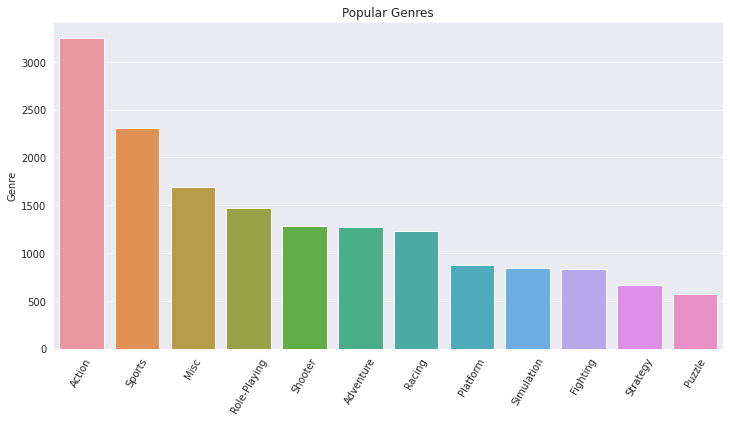

In [18]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title("Popular Genres")
sns.barplot(x=popular_genre.index,y=popular_genre);

Looks like everyone loves action. So majority of the people love action games, lets find out which publishers release the most action games. 
### Q.Which publisher releases the most Action games? 

In [19]:
action_publishers=raw_df.Publisher[raw_df.Genre=='Action']
action_publishers.value_counts().head(10)

Activision                                308
Namco Bandai Games                        247
Ubisoft                                   193
THQ                                       193
Electronic Arts                           182
Capcom                                    154
Warner Bros. Interactive Entertainment    150
Konami Digital Entertainment              143
Tecmo Koei                                137
Sega                                       96
Name: Publisher, dtype: int64

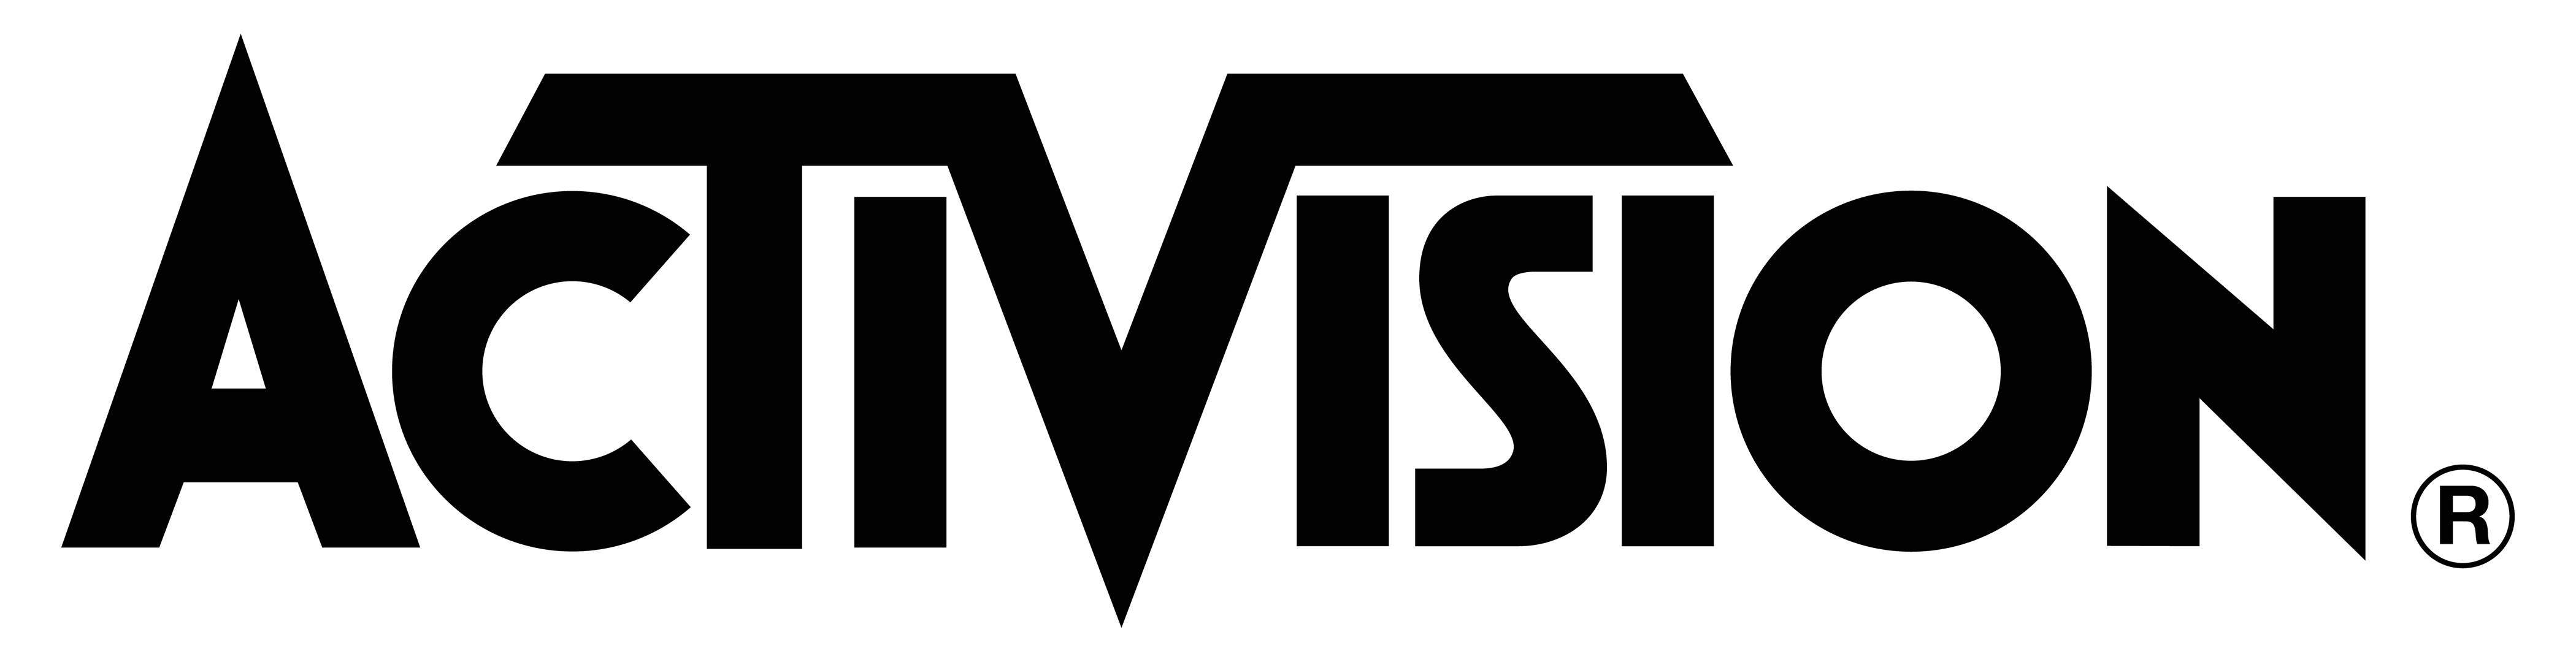

In [20]:
from IPython.display import Image
Image(filename='Activision.jpg')

So Activision is the publisher with the most amount of Action games launched, now let's try finding which are the top selling games of Activision.
### Q.What are the top selling games of Activision?

In [21]:
basic=raw_df[['Name','Year','Global_Sales']]
activision=raw_df.Publisher=='Activision'


In [22]:
activision_df=basic[activision]
top_activision=activision_df.sort_values(by=['Global_Sales'],ascending=False).head(5)
top_activision

,Name,Year,Global_Sales
29,Call of Duty: Modern Warfare 3,2011.0,14.76
31,Call of Duty: Black Ops,2010.0,14.64
33,Call of Duty: Black Ops 3,2015.0,14.24
34,Call of Duty: Black Ops II,2012.0,14.03
35,Call of Duty: Black Ops II,2012.0,13.73


So the top grossing Action game of Activision is Call of Duty:Modern Warfare 3 globally. 
Looks like most people are concerned with their call for duty ,seems nice.
Had to make that bad joke.
Anyways , moving on.

Let's look at the most used platform for gaming.

### Gaming Platforms

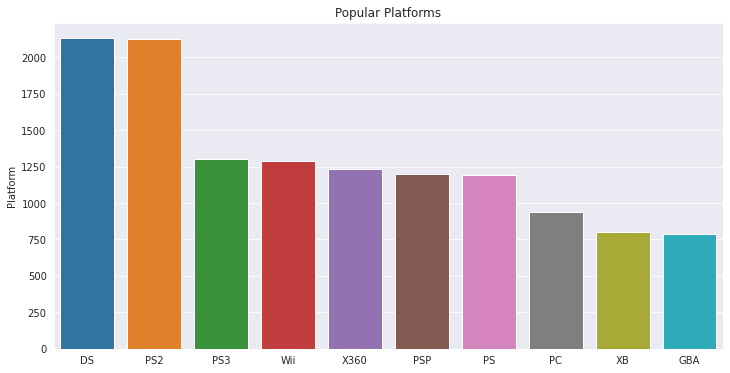

In [23]:
platforms=raw_df.Platform.value_counts().head(10)
plt.figure(figsize=(12,6))
plt.title("Popular Platforms")
sns.barplot(x=platforms.index,y=platforms);

Let's check out the growth of the DS games over the years


In [24]:
DS=raw_df.Platform=='DS'
DS_df=basic[DS]

In [25]:
year_DS=DS_df.sort_values(by=['Year'],ascending=True)
DS_years=year_DS['Year']
DS_Global=year_DS['Global_Sales']

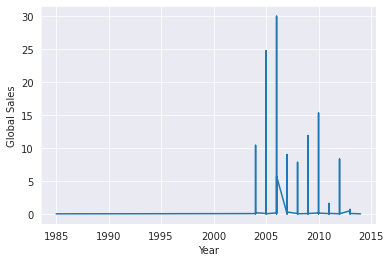

In [26]:
plt.plot(DS_years, DS_Global)
plt.xlabel('Year')
plt.ylabel('Global Sales');

As we observed that the above plotted graph shows the selling of DS platform games over the years.But the graph does not seem very informative right now.It is basically providing the general idea of how the market of DS games was at its best around 2005.

In [27]:
year_DS.drop(year_DS[year_DS.Year<2003].index, inplace=True)
DS_years=year_DS['Year']
DS_Global=year_DS['Global_Sales']

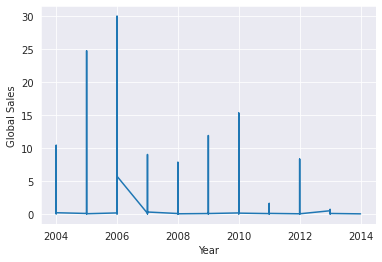

In [28]:
plt.plot(DS_years, DS_Global)
plt.xlabel('Year')
plt.ylabel('Global Sales');

We basically are now looking at the part where the market growth occurs.DS platform games haven't been having a stable selling in the market.The graph looks haphazard and we could analyze that the platform was at its peak in 2006 and then a certain ups and downs trend has been followed.

The top game of DS which was the major hit was 
### Q. The most successful game on DS is 


In [29]:
DS_df.head(1)

,Name,Year,Global_Sales
6,New Super Mario Bros.,2006.0,30.01


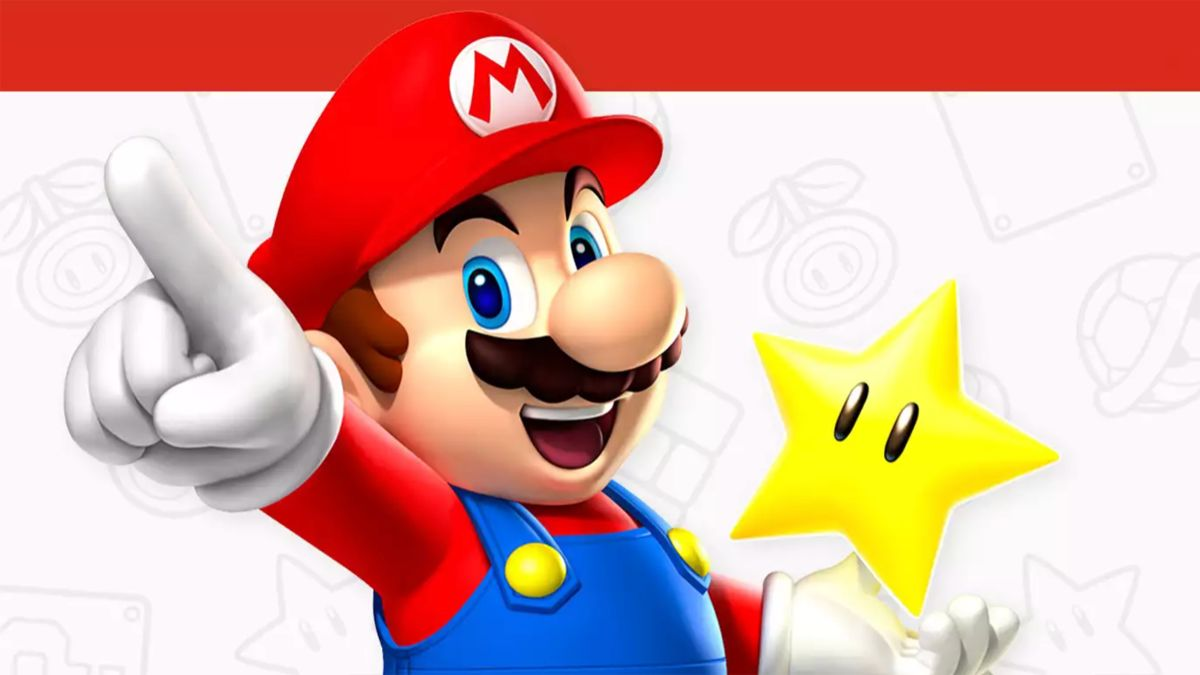

In [30]:
from IPython.display import Image
Image(filename='Mario.jpg')

### Sales

In [31]:
top_global_df=raw_df.sort_values(by=['Global_Sales'],ascending=False).head(10)
top_global_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [32]:
top_games=top_global_df.Name
NA_Sales=top_global_df.NA_Sales
EU_Sales=top_global_df.EU_Sales
JP_Sales=top_global_df.JP_Sales

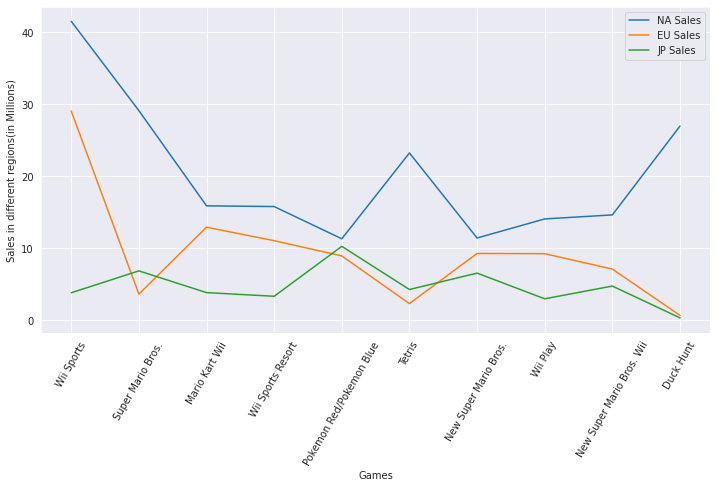

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.plot(top_games,NA_Sales)
plt.plot(top_games,EU_Sales)
plt.plot(top_games,JP_Sales)
plt.legend(['NA Sales', 'EU Sales','JP Sales']);
plt.xlabel('Games')
plt.ylabel('Sales in different regions(in Millions)');

Here analysing this above graph could tell us what type of games are preferred in what region. As people from different regions might have different trends when it comes to playing videogames.

### Publishers


In [34]:
pubwisegame =raw_df.groupby('Publisher')['Name'].count().reset_index()
pubwisegame =pubwisegame.sort_values('Name',ascending=False).reset_index()

In [35]:
top_10=pubwisegame.head(10)

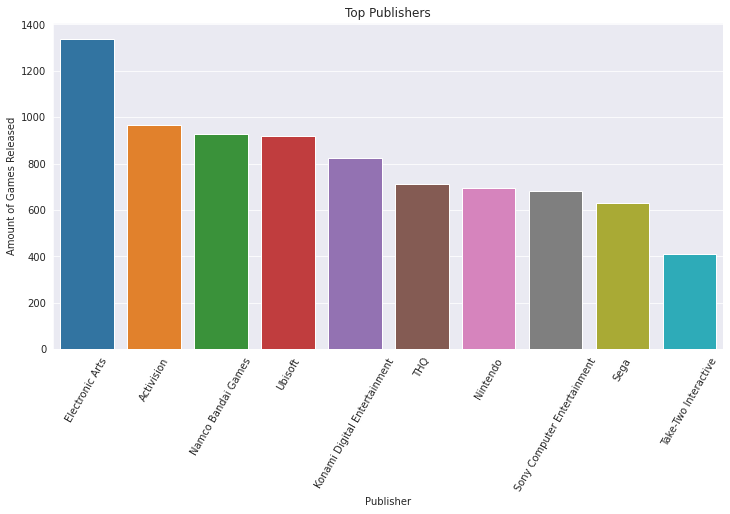

In [36]:
plt.figure(figsize=(12,6))
plt.title("Top Publishers")
plt.xticks(rotation=60)
sns.barplot(x=top_10.Publisher,y=top_10.Name)
plt.ylabel('Amount of Games Released')
plt.xlabel('Publisher');

Now we done drawing some graphs,lets ask some more questions about the data.
### Q. What is the total sales amount earned by the top 3 publishers?

In [37]:
earning=raw_df.groupby('Publisher')['Global_Sales'].sum()
earning.sort_values(ascending=False).head(3)

Publisher
Nintendo           1784.43
Electronic Arts    1093.39
Activision          721.41
Name: Global_Sales, dtype: float64

These are the numbers of games selled(in millions) by the respective companies all over the globe.

### Q. What is the amount of games launched on the most popular platforms?


In [38]:
top_platforms=raw_df.Platform.value_counts().head(5)
top_platforms

DS      2130
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: Platform, dtype: int64

## Summary

Analysing the data set of videogames all over the world we took a thorough look over the trends of Videogames all over the world. We could analyse how the gaming industry has changed over the years and could predict some of the trends which we might observe in the future. The top game publishing companies analyse such data to direct their products in a way which grabs them maximum profit.
We could improve this data analysis by adding more datasets such as the amount of hours the game has been played by users and the records of how much audience gathers when the game is streamed.
This could help us analyse the videogaming industry via a deep perspective

In [39]:
!pip install wordcloud --quiet
from wordcloud import WordCloud


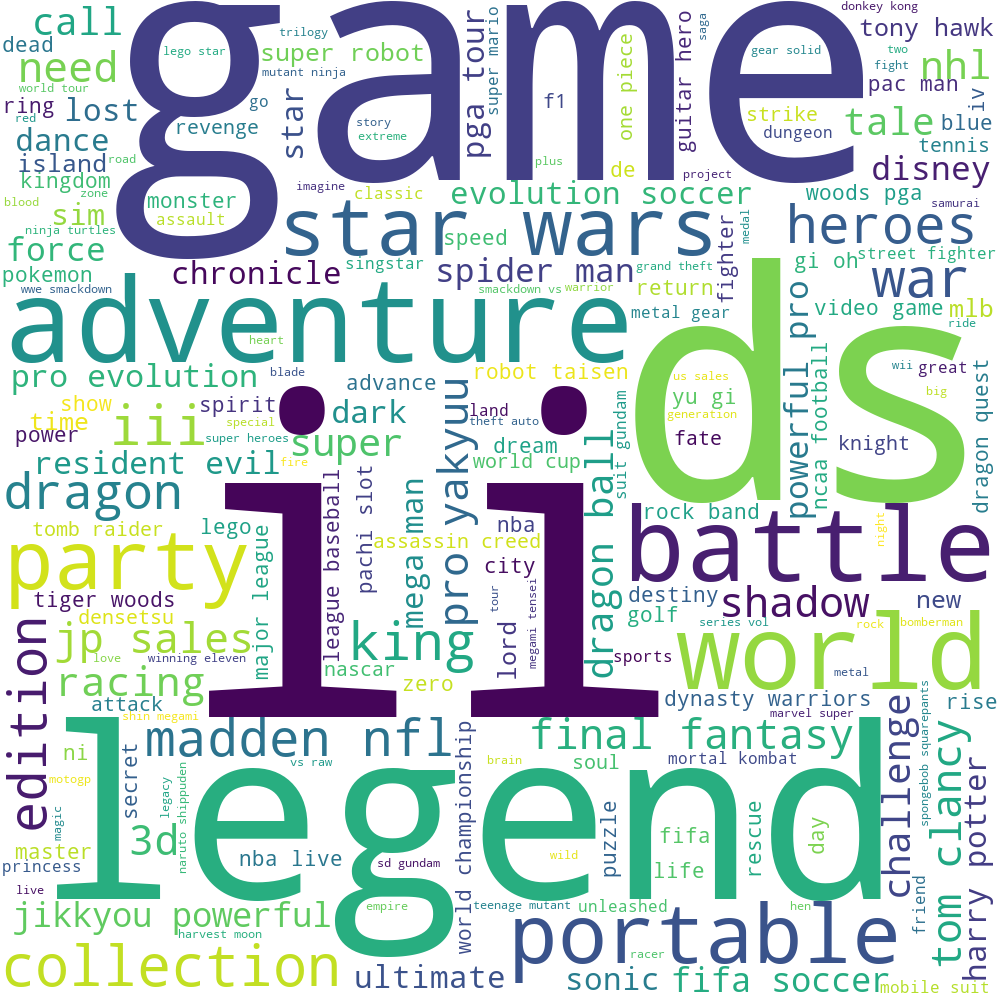

In [40]:
comment_words = ' '
  
for val in raw_df.Name.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
wordcloud.to_image()

## References

Dataset
https://www.kaggle.com/gregorut/videogamesales/tasks?taskId=1441

Other notebooks which helped to learn

https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis/v/10#C2

https://www.kaggle.com/amritachatterjee09/video-game-sales-eda-with-plotly


In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "harshghodkar/project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/harshghodkar/project


'https://jovian.ml/harshghodkar/project'